# LAB 2,3: Particle In 1D Box
**Date: 22-12-23**

> **AIM:** <br>
>  1.  Consider a quantum particle of mass m in a 1D infinite potential well of dimension L.
    Sketch the wavefunction and probability density using python. Label the X-axis interms of ‘L’. Plot and compare the energy levels of the ground state and the first threeexcited states for potential well dimensions L/2, L, 2L. Express energies in units ofh^2/8mL^2.<br>
>  2.  Consider a quantum particle of mass m in a 1D infinite potential well of dimension L.Sketch the wavefunction and probability density of first three eigenstates using python.Label the X-axis in terms of ‘L’. Investigate the change in amplitude and wavelengthof wavefunction as ‘n’ increases.

> ##### Particle in a Box
 The wavefunctions of a particle in a box of length L is given as - <br>
$\quad\quad\quad\quad  \psi = \sin  \dfrac{n \pi x}{L}$ <br>
    The energy of a state n is given as -<br>
    $\quad\quad\quad\quad \epsilon = \dfrac{n^{2} h^{2}}{8 m L^{2}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h
import ipywidgets as widgets
import matplotlib.colors as mcolors
import random
from fractions import Fraction

In [2]:
def wavefunction(x,n = 1,L = 1):
    if(x>L or x<0):
        raise Exception("Particle Outside Box")
        return;
    return np.sin(n*np.pi*x/L)*(2/L)**0.5;

In [3]:
# UNIT - h^2/8mL^2
def energy(n,L):
    if(n<0):
        raise Exception("Negative Ground State Not Allowed")
        return;
    return ((n/L)**2) 

In [4]:
def plotWave(n = [1],L = 1):
    fig = plt.figure(figsize = (18,4))
    
    X = np.linspace(0,L,1000)
    for N in n:
        plt.subplot(1,2,1);
        plt.plot(X,[wavefunction(x,N,L) for x in X], label = "n = {0}".format(N))
        plt.title("Wavefunction of Particle in a Box",fontsize = 15)
        plt.subplot(1,2,2);
        plt.plot(X,[wavefunction(x,N,L)**2 for x in X], label = "n = {0}".format(N))
        plt.title("Probability Density of Particle in a Box",fontsize = 15)
    
    for i in [1,2]:
        plt.subplot(1,2,i)
        plt.xlim(left = 0, right = L);
        plt.grid()
        plt.xticks(ticks = np.linspace(0,L,5), labels = [f"{Fraction(i)}L" for i in np.linspace(0,1,5)])
        plt.legend(fontsize = 15,loc = 3)
    #plt.savefig("Wavefunction")
    plt.show()

In [5]:
def plotEnergy(L = [1],nmax = 5):
    L = list(L)
    L.sort(reverse=True)
    fig = plt.figure(figsize = (15,5))
    color_dict = dict(zip(L,random.choices(list(mcolors.BASE_COLORS.values())[:-2],k = len(L))))
    for l in L:
        plt.axhline(energy(1,l),color = color_dict[l],xmax = l/L[0],label = f"{l}L",linewidth = max(l,1.2))
        for n in range(2,nmax+1):
            plt.axhline(energy(n,l),xmax=l/L[0],color = color_dict[l],linewidth = 2*l)
    plt.xlim(right = max(L))
    plt.grid(axis = 'y',which = 'both')
    plt.ylabel('$h^2/8mL^2$',fontsize = 20)

    xloc = plt.xticks()[0]
    plt.xticks(ticks = xloc, labels = [f"{Fraction(i)}L" for i in xloc])
    plt.legend(fontsize = 20)
    #plt.savefig("EnergyDiagram")
    plt.show()

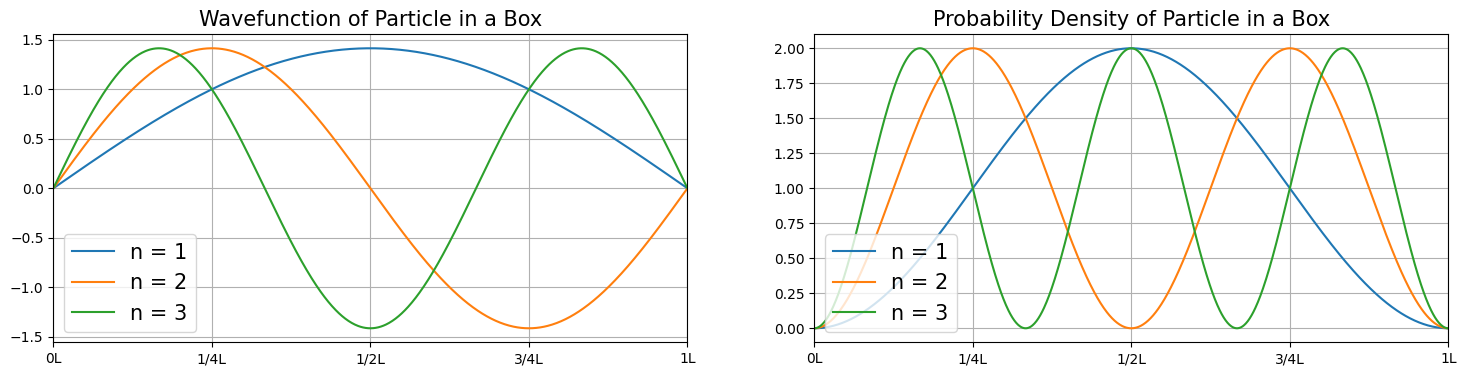

In [6]:
plotWave(n = [1,2,3], L = 1)

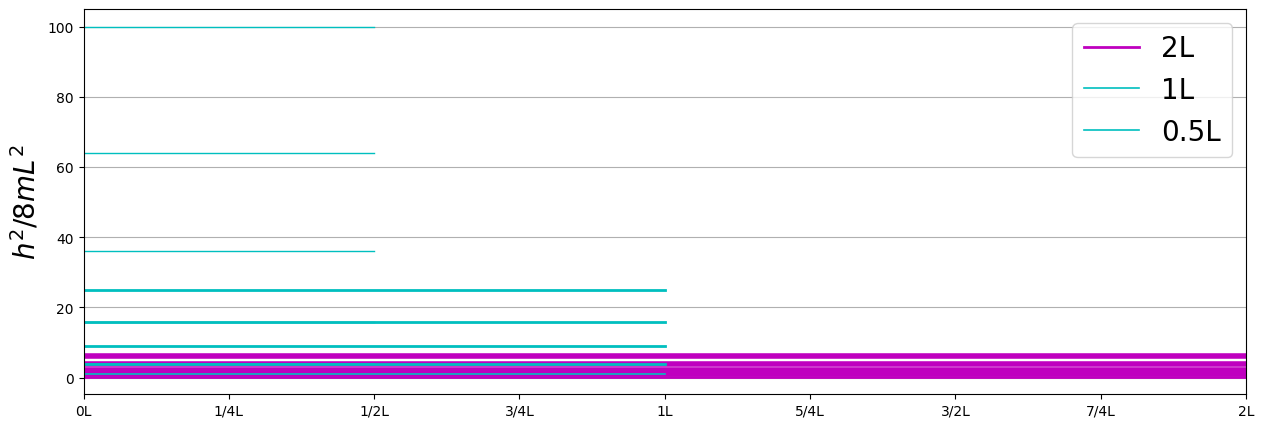

In [7]:
plotEnergy([0.5,1,2])

In [8]:
widgets.interactive(plotWave,n = widgets.SelectMultiple(
    options=[1,2,3,4,5,6,7,8,9,10],
    value=[1],
    rows=10,
    description='N = ',
    disabled=False),L = widgets.fixed(1))

interactive(children=(SelectMultiple(description='N = ', index=(0,), options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), …

In [9]:
def superpositionWave(n = [1],L = 1):
    fig = plt.figure(figsize = (18,4))
    X = np.linspace(0,L,1000)  
    psi = np.ones(len(X))
    for N in n:
        plt.subplot(1,2,1);
        psi = np.vstack((psi,np.array([wavefunction(x,N,L) for x in X])))
        plt.plot(X, psi[-1], label = "n = {0}".format(N))
        plt.title("Wavefunction of Particle in a Box",fontsize = 15)
        plt.subplot(1,2,2);
        plt.plot(X,psi[-1]**2, label = "n = {0}".format(N))
        plt.title("Probability Density of Particle in a Box",fontsize = 15)
    plt.subplot(1,2,1);
    plt.plot(X, np.cumprod(psi,axis = 0)[-1], label = "Superposition",color = "black")
    plt.subplot(1,2,2);
    plt.plot(X,np.cumprod(psi,axis = 0)[-1]**2, label = "Superposition",color = "black")
    for i in [1,2]:
        plt.subplot(1,2,i)
        plt.xlim(left = 0, right = L);
        #plt.ylim(bottom = -1, top = 1);
        plt.grid()
        plt.xticks([0,L/4,L/2,3*L/4,L],["0","L/4","L/2","3L/4","L"])
        plt.legend(fontsize = 8)
    plt.show()

widgets.interactive(superpositionWave,n = widgets.SelectMultiple(
    options=[1,2,3,4,5,6,7,8,9,10],
    value=[1],
    rows=10,
    description='N = ',
    disabled=False),L = widgets.fixed(1))

interactive(children=(SelectMultiple(description='N = ', index=(0,), options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), …

In [10]:
widgets.interactive(plotEnergy,L = widgets.SelectMultiple(
    options=np.linspace(0.25,2,8),
    value=[1],
    rows=8,
    description='L = ',
    disabled=False
),nmax = widgets.IntSlider(value=5,max=10,min = 1,step=1))

interactive(children=(SelectMultiple(description='L = ', index=(3,), options=(0.25, 0.5, 0.75, 1.0, 1.25, 1.5,…